<a href="https://colab.research.google.com/github/ducanh0405/datastorm/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

In [200]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
import math
from geopy.distance import geodesic
import folium
from folium.plugins import MarkerCluster
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [198]:
!pip install catboost

In [201]:
train_df = pd.read_csv('/content/drive/MyDrive/data/Data/train.csv')
train_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11/3/2022,23:50:00,0:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,7/3/2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [202]:
train_df.shape

(45593, 20)

In [203]:
print("\nTrain head:")
display(train_df.head())


Train head:


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [204]:
print("\nTrain info:")
print(train_df.info())


Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Veh

In [205]:
print("\n train describe")
display(train_df.describe())


 train describe


,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


missing value

In [206]:
def missing_summary(df, name):
    miss = df.isnull().sum()
    miss = miss[miss > 0].sort_values(ascending=False)
    if not miss.empty:
        print(f"\n{name} missing values:")
        print(miss)
    else:
        print(f"\n{name} has no missing values.")

missing_summary(train_df, "Train")


Train has no missing values.


In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After running the cell above and authorizing access, your Google Drive will be mounted at `/content/drive`. You can then access your files using the path `/content/drive/My Drive/your_file_name.csv`.

For example, if your file `cleaned_dataset.csv` is in the root of your Google Drive, you can read it like this:

In [208]:
import pandas as pd

file_path_in_drive = '/content/drive/MyDrive/data/Data/train.csv'
try:
    df = pd.read_csv(file_path_in_drive)
    print("Successfully loaded data from Google Drive:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path_in_drive}. Please check the file path in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded data from Google Drive:


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


Unique values

In [209]:
# Unique values

print("\nUnique values per column (TRAIN):")
print("*" * 50)
for col in train_df.columns:
    unique_vals = train_df[col].unique()
    n_unique = train_df[col].nunique()

    print(f"\nColumn: {col}")
    print(f"Number of unique values: {n_unique}")

    if n_unique <= 10:
        print("Values:", list(unique_vals))
    else:
        print("list of values:", list(unique_vals[:10]))
    print("*" * 50)


Unique values per column (TRAIN):
**************************************************

Column: ID
Number of unique values: 45593
list of values: ['0x4607 ', '0xb379 ', '0x5d6d ', '0x7a6a ', '0x70a2 ', '0x9bb4 ', '0x95b4 ', '0x9eb2 ', '0x1102 ', '0xcdcd ']
**************************************************

Column: Delivery_person_ID
Number of unique values: 1320
list of values: ['INDORES13DEL02 ', 'BANGRES18DEL02 ', 'BANGRES19DEL01 ', 'COIMBRES13DEL02 ', 'CHENRES12DEL01 ', 'HYDRES09DEL03 ', 'RANCHIRES15DEL01 ', 'MYSRES15DEL02 ', 'HYDRES05DEL02 ', 'DEHRES17DEL01 ']
**************************************************

Column: Delivery_person_Age
Number of unique values: 23
list of values: ['37', '34', '23', '38', '32', '22', '33', '35', '36', '21']
**************************************************

Column: Delivery_person_Ratings
Number of unique values: 29
list of values: ['4.9', '4.5', '4.4', '4.7', '4.6', '4.8', '4.2', '4.3', '4', '4.1']
***********************************************

target column

In [210]:
if "Time_taken(min)" in train_df.columns:
    print("\nTarget column stats:")
    print(train_df["Time_taken(min)"].describe())
    print("\nSample values:", train_df["Time_taken(min)"].unique()[:10])


Target column stats:
count        45593
unique          45
top       (min) 26
freq          2123
Name: Time_taken(min), dtype: object

Sample values: ['(min) 24' '(min) 33' '(min) 26' '(min) 21' '(min) 30' '(min) 40'
 '(min) 32' '(min) 34' '(min) 46' '(min) 23']


In [211]:
train_df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

#CLEANING THE DATA

In [212]:
#cleaning the columns
def basic_clean(df):
    df = df.copy()
    # standardizing column names
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    # parsing date/time columns if present
    if "order_date" in df.columns:
        df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce", dayfirst=True)
    for tcol in ["time_orderd", "time_order_picked"]:
        if tcol in df.columns:
            df[tcol] = pd.to_datetime(df[tcol], errors="coerce").dt.round("s")

    # clean and convert numeric columns
    df = df.rename(columns={"time_taken(min)": "time_taken_min"})
    if "time_taken_min" in df.columns:
        df["time_taken_min"] = (
            df["time_taken_min"]
            .astype(str)
            .str.extract(r"(\d+)")
            .astype(float)
        )

    for col in ["delivery_person_age", "delivery_person_ratings", "vehicle_condition", "multiple_deliveries"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # trimming string columns
    for col in df.select_dtypes(include=["object"]).columns:
        df[col] = df[col].astype(str).str.strip()

    return df



train_df = basic_clean(train_df)

In [213]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           45593 non-null  object        
 1   delivery_person_id           45593 non-null  object        
 2   delivery_person_age          43739 non-null  float64       
 3   delivery_person_ratings      43685 non-null  float64       
 4   restaurant_latitude          45593 non-null  float64       
 5   restaurant_longitude         45593 non-null  float64       
 6   delivery_location_latitude   45593 non-null  float64       
 7   delivery_location_longitude  45593 non-null  float64       
 8   order_date                   24589 non-null  datetime64[ns]
 9   time_orderd                  43862 non-null  datetime64[ns]
 10  time_order_picked            45593 non-null  datetime64[ns]
 11  weatherconditions            45593 non-nu

In [214]:
train_df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-10-15 11:30:00,2025-10-15 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-10-15 19:45:00,2025-10-15 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-10-15 08:30:00,2025-10-15 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,NaT,2025-10-15 18:00:00,2025-10-15 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-10-15 13:30:00,2025-10-15 13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2025-10-15 11:35:00,2025-10-15 11:45:00,conditions Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32.0
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2025-10-15 19:55:00,2025-10-15 20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36.0
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,NaT,2025-10-15 23:50:00,2025-10-15 00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16.0
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,NaT,2025-10-15 13:35:00,2025-10-15 13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26.0


In [215]:
(train_df.isna().sum() / len(train_df)) * 100

,0
id,0.000000
delivery_person_id,0.000000
delivery_person_age,4.066414
delivery_person_ratings,4.184853
restaurant_latitude,0.000000
restaurant_longitude,0.000000
delivery_location_latitude,0.000000
delivery_location_longitude,0.000000
order_date,46.068475
time_orderd,3.796635


In [216]:
print("Missing values in Train set:")
print(train_df.isna().sum()[train_df.isna().sum() > 0])

Missing values in Train set:
delivery_person_age         1854
delivery_person_ratings     1908
order_date                 21004
time_orderd                 1731
multiple_deliveries          993
dtype: int64


In [217]:
train_df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-10-15 11:30:00,2025-10-15 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-10-15 19:45:00,2025-10-15 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-10-15 08:30:00,2025-10-15 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,NaT,2025-10-15 18:00:00,2025-10-15 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-10-15 13:30:00,2025-10-15 13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2025-10-15 11:35:00,2025-10-15 11:45:00,conditions Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32.0
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2025-10-15 19:55:00,2025-10-15 20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36.0
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,NaT,2025-10-15 23:50:00,2025-10-15 00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16.0
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,NaT,2025-10-15 13:35:00,2025-10-15 13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26.0


#FEATURE ENGINEERING

In [218]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           45593 non-null  object        
 1   delivery_person_id           45593 non-null  object        
 2   delivery_person_age          43739 non-null  float64       
 3   delivery_person_ratings      43685 non-null  float64       
 4   restaurant_latitude          45593 non-null  float64       
 5   restaurant_longitude         45593 non-null  float64       
 6   delivery_location_latitude   45593 non-null  float64       
 7   delivery_location_longitude  45593 non-null  float64       
 8   order_date                   24589 non-null  datetime64[ns]
 9   time_orderd                  43862 non-null  datetime64[ns]
 10  time_order_picked            45593 non-null  datetime64[ns]
 11  weatherconditions            45593 non-nu

In [219]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [220]:
train_df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-10-15 11:30:00,2025-10-15 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-10-15 19:45:00,2025-10-15 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-10-15 08:30:00,2025-10-15 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,NaT,2025-10-15 18:00:00,2025-10-15 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-10-15 13:30:00,2025-10-15 13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0


In [221]:
# order/pick hours
# Ensure columns exist before accessing them
if 'time_orderd' in train_df.columns and 'time_order_picked' in train_df.columns:
    train_df["order_hour"] = pd.to_datetime(train_df["time_orderd"], errors="coerce").dt.hour
    train_df["pickup_hour"] = pd.to_datetime(train_df["time_order_picked"], errors="coerce").dt.hour
else:
    print("Error: Required columns 'time_orderd' or 'time_order_picked' not found.")
    # Optionally, initialize columns with NaN or a default value if they don't exist
    # train_df["order_hour"] = np.nan
    # train_df["pickup_hour"] = np.nan

In [222]:
# delivery_duration (minutes)
if 'time_orderd' in train_df.columns and 'time_order_picked' in train_df.columns:
    train_df["delivery_duration_min"] = (pd.to_datetime(train_df["time_order_picked"]) - pd.to_datetime(train_df["time_orderd"])).dt.total_seconds()/60
    display(train_df["delivery_duration_min"])
else:
    print("Error: Required columns 'time_orderd' or 'time_order_picked' not found for delivery duration calculation.")

,delivery_duration_min
0,15.0
1,5.0
2,15.0
3,10.0
4,15.0
...,...
45588,10.0
45589,15.0
45590,-1425.0
45591,5.0


Negative values for delivery duration

train_df.loc[train_df["delivery_duration_min"] < 0, ["time_orderd", "time_order_picked"]]

In [223]:
def fix_delivery_duration(df, order_col="time_orderd", pick_col="time_order_picked"):
    # Ensure datetime
    if order_col in df.columns and pick_col in df.columns:
        df[order_col] = pd.to_datetime(df[order_col], errors='coerce')
        df[pick_col] = pd.to_datetime(df[pick_col], errors='coerce')

        # If pick-up is earlier than order (spans midnight), adding 1 day
        # Only apply if both columns are not entirely NaT
        if not df[order_col].isna().all() and not df[pick_col].isna().all():
             # Calculate difference and identify rows where pickup is before order
             diff = (df[pick_col] - df[order_col])
             # Handle cases where time_orderd is NaT or time_order_picked is NaT before comparison
             needs_day_add = diff.dt.total_seconds() < 0

             # Add a day only to non-NaT time_order_picked entries that need it
             df.loc[needs_day_add & df[pick_col].notna(), pick_col] += pd.Timedelta(days=1)


        # Calculate duration in minutes, handling potential NaT values
        df["delivery_duration_min"] = (df[pick_col] - df[order_col]).dt.total_seconds() / 60
    else:
        print(f"Warning: Required columns '{order_col}' or '{pick_col}' not found in DataFrame. Cannot fix delivery duration.")
        df["delivery_duration_min"] = np.nan # Add the column with NaN values if input columns are missing
    return df

# Apply to train and test sets
train_df = fix_delivery_duration(train_df)

In [224]:
#Rechecking again
# delivery_duration (minutes)
if 'time_orderd' in train_df.columns and 'time_order_picked' in train_df.columns:
    train_df["delivery_duration_min"] = (pd.to_datetime(train_df["time_order_picked"]) - pd.to_datetime(train_df["time_orderd"])).dt.total_seconds()/60
    train_df["delivery_duration_min"]
else:
    print("Error: Required columns 'time_orderd' or 'time_order_picked' not found for delivery duration calculation.")

In [225]:
# day/month/week
if 'order_date' in train_df.columns:
    train_df["day_of_week"] = train_df["order_date"].dt.day_name()
    train_df["is_weekend"] = train_df["order_date"].dt.dayofweek >= 5
    train_df["month"] = train_df["order_date"].dt.month
else:
    print("Error: Required column 'order_date' not found for creating date features.")
    # Optionally, initialize columns with NaN or a default value if the input column is missing
    # train_df["day_of_week"] = np.nan
    # train_df["is_weekend"] = False
    # train_df["month"] = np.nan

In [189]:
train_df.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weatherconditions,vehicle_condition,type_of_order,type_of_vehicle,...,pickup_hour,delivery_duration_min,day_of_week,is_weekend,month,delivery_distance_km,prep_time_min,is_rush_hour,order_shift,traffic_level
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,2,Snack,motorcycle,...,11,NaN,Saturday,True,3.0,3.025149,15.0,True,morning,3.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,2,Snack,scooter,...,19,NaN,Friday,False,3.0,20.183530,5.0,True,evening,4.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,0,Drinks,motorcycle,...,8,NaN,Saturday,True,3.0,1.552758,15.0,True,morning,1.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,0,Buffet,motorcycle,...,18,NaN,Thursday,False,3.0,7.790401,10.0,True,evening,2.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,1,Snack,scooter,...,13,NaN,Saturday,True,3.0,6.210138,15.0,True,afternoon,3.0


In [226]:
# clean traffic strings
train_df["weatherconditions"] = train_df["weatherconditions"].str.replace("conditions ", "", regex=False).str.strip()
train_df["city"] = train_df["city"].replace({"Metropolitian":"Metropolitan"})

In [227]:
# distance
coords = ["restaurant_latitude","restaurant_longitude","delivery_location_latitude","delivery_location_longitude"]
if all(c in train_df.columns for c in coords):
    train_df["delivery_distance_km"] = haversine_distance(train_df["restaurant_latitude"].astype(float),
                                                    train_df["restaurant_longitude"].astype(float),
                                                    train_df["delivery_location_latitude"].astype(float),
                                                    train_df["delivery_location_longitude"].astype(float))

In [228]:
train_df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,...,festival,city,time_taken_min,order_hour,pickup_hour,delivery_duration_min,day_of_week,is_weekend,month,delivery_distance_km
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-10-15 11:30:00,...,No,Urban,24.0,11.0,11,15.0,Saturday,True,3.0,3.025149
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-10-15 19:45:00,...,No,Metropolitan,33.0,19.0,19,5.0,Friday,False,3.0,20.183530
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-10-15 08:30:00,...,No,Urban,26.0,8.0,8,15.0,Saturday,True,3.0,1.552758
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,NaT,2025-10-15 18:00:00,...,No,Metropolitan,21.0,18.0,18,10.0,NaN,False,NaN,7.790401
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-10-15 13:30:00,...,No,Metropolitan,30.0,13.0,13,15.0,Saturday,True,3.0,6.210138


In [229]:
# prep-time
train_df["prep_time_min"] = (pd.to_datetime(train_df["time_order_picked"]) - pd.to_datetime(train_df["time_orderd"])).dt.total_seconds()/60
train_df["prep_time_min"]

,prep_time_min
0,15.0
1,5.0
2,15.0
3,10.0
4,15.0
...,...
45588,10.0
45589,15.0
45590,15.0
45591,5.0


In [230]:
# Rush hours
train_df["is_rush_hour"] = train_df["order_hour"].isin([7,8,9,11,12,13,18,19,20])
train_df["order_shift"] = np.where(train_df["order_hour"] < 12, "morning", np.where(train_df["order_hour"] < 18, "afternoon", "evening"))

In [231]:
train_df.tail()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,...,order_hour,pickup_hour,delivery_duration_min,day_of_week,is_weekend,month,delivery_distance_km,prep_time_min,is_rush_hour,order_shift
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2025-10-15 11:35:00,...,11.0,11,10.0,Thursday,False,3.0,1.489846,10.0,True,morning
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2025-10-15 19:55:00,...,19.0,20,15.0,Wednesday,False,2.0,11.007735,15.0,True,evening
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,NaT,2025-10-15 23:50:00,...,23.0,0,15.0,NaN,False,NaN,4.657195,15.0,False,evening
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,NaT,2025-10-15 13:35:00,...,13.0,13,5.0,NaN,False,NaN,6.232393,5.0,True,afternoon
45592,0x5fb2,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,NaT,2025-10-15 17:10:00,...,17.0,17,5.0,NaN,False,NaN,12.074396,5.0,False,afternoon


In [232]:
# Road traffic
train_df["road_traffic_density"] = train_df["road_traffic_density"].astype(str).str.strip()
map_traffic = {"Low":1, "Medium":2, "High":3, "Jam":4}
train_df["traffic_level"] = train_df["road_traffic_density"].map(map_traffic).fillna(0)

In [233]:
train_df["traffic_level"]

,traffic_level
0,3.0
1,4.0
2,1.0
3,2.0
4,3.0
...,...
45588,3.0
45589,4.0
45590,1.0
45591,3.0


In [234]:
train_df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,...,pickup_hour,delivery_duration_min,day_of_week,is_weekend,month,delivery_distance_km,prep_time_min,is_rush_hour,order_shift,traffic_level
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-10-15 11:30:00,...,11,15.0,Saturday,True,3.0,3.025149,15.0,True,morning,3.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-10-15 19:45:00,...,19,5.0,Friday,False,3.0,20.183530,5.0,True,evening,4.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-10-15 08:30:00,...,8,15.0,Saturday,True,3.0,1.552758,15.0,True,morning,1.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,NaT,2025-10-15 18:00:00,...,18,10.0,NaN,False,NaN,7.790401,10.0,True,evening,2.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-10-15 13:30:00,...,13,15.0,Saturday,True,3.0,6.210138,15.0,True,afternoon,3.0


In [235]:
numeric_cols = []
categorical_cols = []

for col in train_df.columns:
    if train_df[col].dtype in ["int64", "float64"]:
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['delivery_person_age', 'delivery_person_ratings', 'restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'vehicle_condition', 'multiple_deliveries', 'time_taken_min', 'order_hour', 'delivery_duration_min', 'month', 'delivery_distance_km', 'prep_time_min', 'traffic_level']
Categorical columns: ['id', 'delivery_person_id', 'order_date', 'time_orderd', 'time_order_picked', 'weatherconditions', 'road_traffic_density', 'type_of_order', 'type_of_vehicle', 'festival', 'city', 'pickup_hour', 'day_of_week', 'is_weekend', 'is_rush_hour', 'order_shift']


In [236]:
drop_cols = [
    "id", "delivery_person_id", "order_date", "time_orderd", "time_order_picked",
    "road_traffic_density"
]

train_df = train_df.drop(drop_cols, axis=1)

In [237]:
train_df.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weatherconditions,vehicle_condition,type_of_order,type_of_vehicle,...,pickup_hour,delivery_duration_min,day_of_week,is_weekend,month,delivery_distance_km,prep_time_min,is_rush_hour,order_shift,traffic_level
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,2,Snack,motorcycle,...,11,15.0,Saturday,True,3.0,3.025149,15.0,True,morning,3.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,2,Snack,scooter,...,19,5.0,Friday,False,3.0,20.183530,5.0,True,evening,4.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,0,Drinks,motorcycle,...,8,15.0,Saturday,True,3.0,1.552758,15.0,True,morning,1.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,0,Buffet,motorcycle,...,18,10.0,NaN,False,NaN,7.790401,10.0,True,evening,2.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,1,Snack,scooter,...,13,15.0,Saturday,True,3.0,6.210138,15.0,True,afternoon,3.0


In [238]:
train_df.columns

Index(['delivery_person_age', 'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'weatherconditions', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city', 'time_taken_min', 'order_hour', 'pickup_hour',
       'delivery_duration_min', 'day_of_week', 'is_weekend', 'month',
       'delivery_distance_km', 'prep_time_min', 'is_rush_hour', 'order_shift',
       'traffic_level'],
      dtype='object')

Dealing with missing values

Columns with missing values:
                          Missing_Count  Missing_Percent
month                            21004        46.068475
day_of_week                      21004        46.068475
delivery_person_ratings           1908         4.184853
delivery_person_age               1854         4.066414
delivery_duration_min             1731         3.796635
order_hour                        1731         3.796635
prep_time_min                     1731         3.796635
multiple_deliveries                993         2.177966


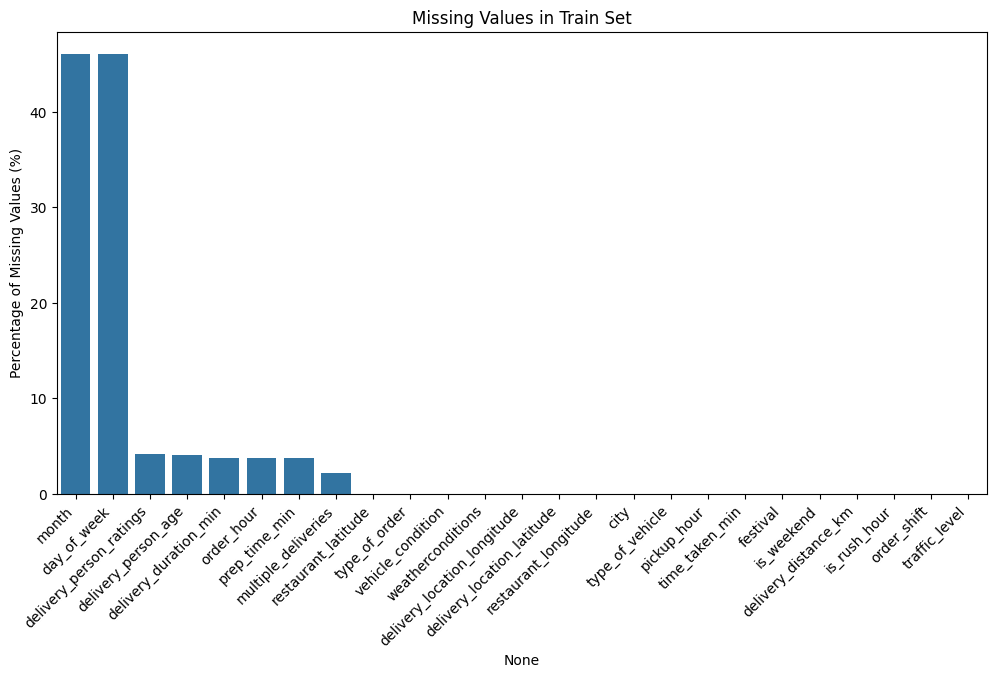

In [239]:
# Calculate missing values
missing = train_df.isnull().sum()
missing_percent = (missing / len(train_df)) * 100

# Combine into a DataFrame
missing_df = pd.DataFrame({
    "Missing_Count": missing,
    "Missing_Percent": missing_percent
}).sort_values(by="Missing_Percent", ascending=False)

print("Columns with missing values:\n", missing_df[missing_df["Missing_Count"] > 0])

# Plot missing percentages
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(x=missing_df.index, y=missing_df["Missing_Percent"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage of Missing Values (%)")
plt.title("Missing Values in Train Set")
plt.show()

In [254]:
#Handling Missing Value
# 1. Check missing values
missing = train_df.isnull().sum()
missing_percent = (missing / len(train_df)) * 100
missing_df = pd.DataFrame({
    "Missing_Count": missing,
    "Missing_Percent": missing_percent
}).sort_values(by="Missing_Percent", ascending=False)

print("Columns with missing values:\n", missing_df[missing_df["Missing_Count"] > 0])

# Replace 0 and very small values in lat/lon columns with NaN
# A small threshold like 1e-6 can be used to catch values very close to 0
lat_lon_cols = ['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude']
threshold = 1e-6
for col in lat_lon_cols:
    if col in train_df.columns:
        # Replace values where absolute value is less than threshold with NaN
        # Use .loc to avoid SettingWithCopyWarning
        train_df.loc[train_df[col].abs() < threshold, col] = np.nan
        print(f"Replaced 0 and very small values with NaN in column: {col}")

# 2. Split columns by type
numeric_cols = train_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=["object", "bool"]).columns.tolist()


# 3. Fill numeric columns with median
for col in numeric_cols:
    if train_df[col].isnull().sum() > 0:
        median_val = train_df[col].median()
        train_df[col].fillna(median_val, inplace=True)


# 4. Fill categorical columns with mode
for col in categorical_cols:
    if train_df[col].isnull().sum() > 0:
        mode_val = train_df[col].mode()[0]
        train_df[col].fillna(mode_val, inplace=True)


print("\n Missing values treated successfully.")

Columns with missing values:
 Empty DataFrame
Columns: [Missing_Count, Missing_Percent]
Index: []
Replaced 0 and very small values with NaN in column: restaurant_latitude
Replaced 0 and very small values with NaN in column: restaurant_longitude
Replaced 0 and very small values with NaN in column: delivery_location_latitude
Replaced 0 and very small values with NaN in column: delivery_location_longitude

 Missing values treated successfully.


In [250]:
# Convert 'NaN' strings to proper np.nan
train_df.replace(["NaN ", "nan", "NULL", "null", "None"], np.nan, inplace=True)

In [251]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   delivery_person_age          45593 non-null  float64
 1   delivery_person_ratings      45593 non-null  float64
 2   restaurant_latitude          45593 non-null  float64
 3   restaurant_longitude         45593 non-null  float64
 4   delivery_location_latitude   45593 non-null  float64
 5   delivery_location_longitude  45593 non-null  float64
 6   weatherconditions            45593 non-null  object 
 7   vehicle_condition            45593 non-null  int64  
 8   type_of_order                45593 non-null  object 
 9   type_of_vehicle              45593 non-null  object 
 10  multiple_deliveries          45593 non-null  float64
 11  festival                     45593 non-null  object 
 12  city                         45593 non-null  object 
 13  time_taken_min  

Remove unnescesary columns

In [263]:
# List of columns to drop
columns_to_drop = [
    'restaurant_latitude', 'restaurant_longitude',
    'delivery_location_latitude', 'delivery_location_longitude',
    'vehicle_condition', 'pickup_hour',
    'delivery_person_age', 'delivery_person_ratings',
    'type_of_vehicle'
]

# Drop the specified columns
# Using errors='ignore' so it doesn't raise an error if a column is already missing
train_df = train_df.drop(columns=columns_to_drop, errors='ignore')

print(f"Dropped columns: {columns_to_drop}")
print("\nDataFrame after dropping columns:")
display(train_df.head())

Dropped columns: ['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'vehicle_condition', 'pickup_hour', 'delivery_person_age', 'delivery_person_ratings', 'type_of_vehicle']

DataFrame after dropping columns:


,weatherconditions,type_of_order,multiple_deliveries,festival,city,time_taken_min,order_hour,delivery_duration_min,day_of_week,is_weekend,month,delivery_distance_km,prep_time_min,is_rush_hour,order_shift,traffic_level
0,Sunny,Snack,0.0,No,Urban,24.0,11.0,15.0,Saturday,True,3.0,3.025149,15.0,True,morning,3.0
1,Stormy,Snack,1.0,No,Metropolitan,33.0,19.0,5.0,Friday,False,3.0,20.183530,5.0,True,evening,4.0
2,Sandstorms,Drinks,1.0,No,Urban,26.0,8.0,15.0,Saturday,True,3.0,1.552758,15.0,True,morning,1.0
3,Sunny,Buffet,1.0,No,Metropolitan,21.0,18.0,10.0,Thursday,False,3.0,7.790401,10.0,True,evening,2.0
4,Cloudy,Snack,1.0,No,Metropolitan,30.0,13.0,15.0,Saturday,True,3.0,6.210138,15.0,True,afternoon,3.0


ĐỂ XUẤT FILE current state

In [264]:
# Save the current DataFrame to a CSV file
output_csv_path = 'train_df_current_state.csv'
train_df.to_csv(output_csv_path, index=False)

print(f"Current train_df saved to {output_csv_path}")

# Display the first few rows of the saved DataFrame as a preview
print("\nFirst 5 rows of the saved DataFrame:")
display(train_df.head())

Current train_df saved to train_df_current_state.csv

First 5 rows of the saved DataFrame:


,weatherconditions,type_of_order,multiple_deliveries,festival,city,time_taken_min,order_hour,delivery_duration_min,day_of_week,is_weekend,month,delivery_distance_km,prep_time_min,is_rush_hour,order_shift,traffic_level
0,Sunny,Snack,0.0,No,Urban,24.0,11.0,15.0,Saturday,True,3.0,3.025149,15.0,True,morning,3.0
1,Stormy,Snack,1.0,No,Metropolitan,33.0,19.0,5.0,Friday,False,3.0,20.183530,5.0,True,evening,4.0
2,Sandstorms,Drinks,1.0,No,Urban,26.0,8.0,15.0,Saturday,True,3.0,1.552758,15.0,True,morning,1.0
3,Sunny,Buffet,1.0,No,Metropolitan,21.0,18.0,10.0,Thursday,False,3.0,7.790401,10.0,True,evening,2.0
4,Cloudy,Snack,1.0,No,Metropolitan,30.0,13.0,15.0,Saturday,True,3.0,6.210138,15.0,True,afternoon,3.0


data cleaning analaysis

Preparing the dataset proved challenging due to several data quality issues in both training and testing splits. The raw data contained incomplete timestamp records, literal "NaN" text entries, and various anomalies requiring extensive cleanup. Beyond standard preprocessing, we created additional features—including calculated delivery distances, peak-hour indicators, and shift-based order categorizations—to help the model capture realistic delivery dynamics. The critical task was ensuring both datasets maintained identical clean formats and feature sets before training began.

#Exploratory Data Analysis(EDA)

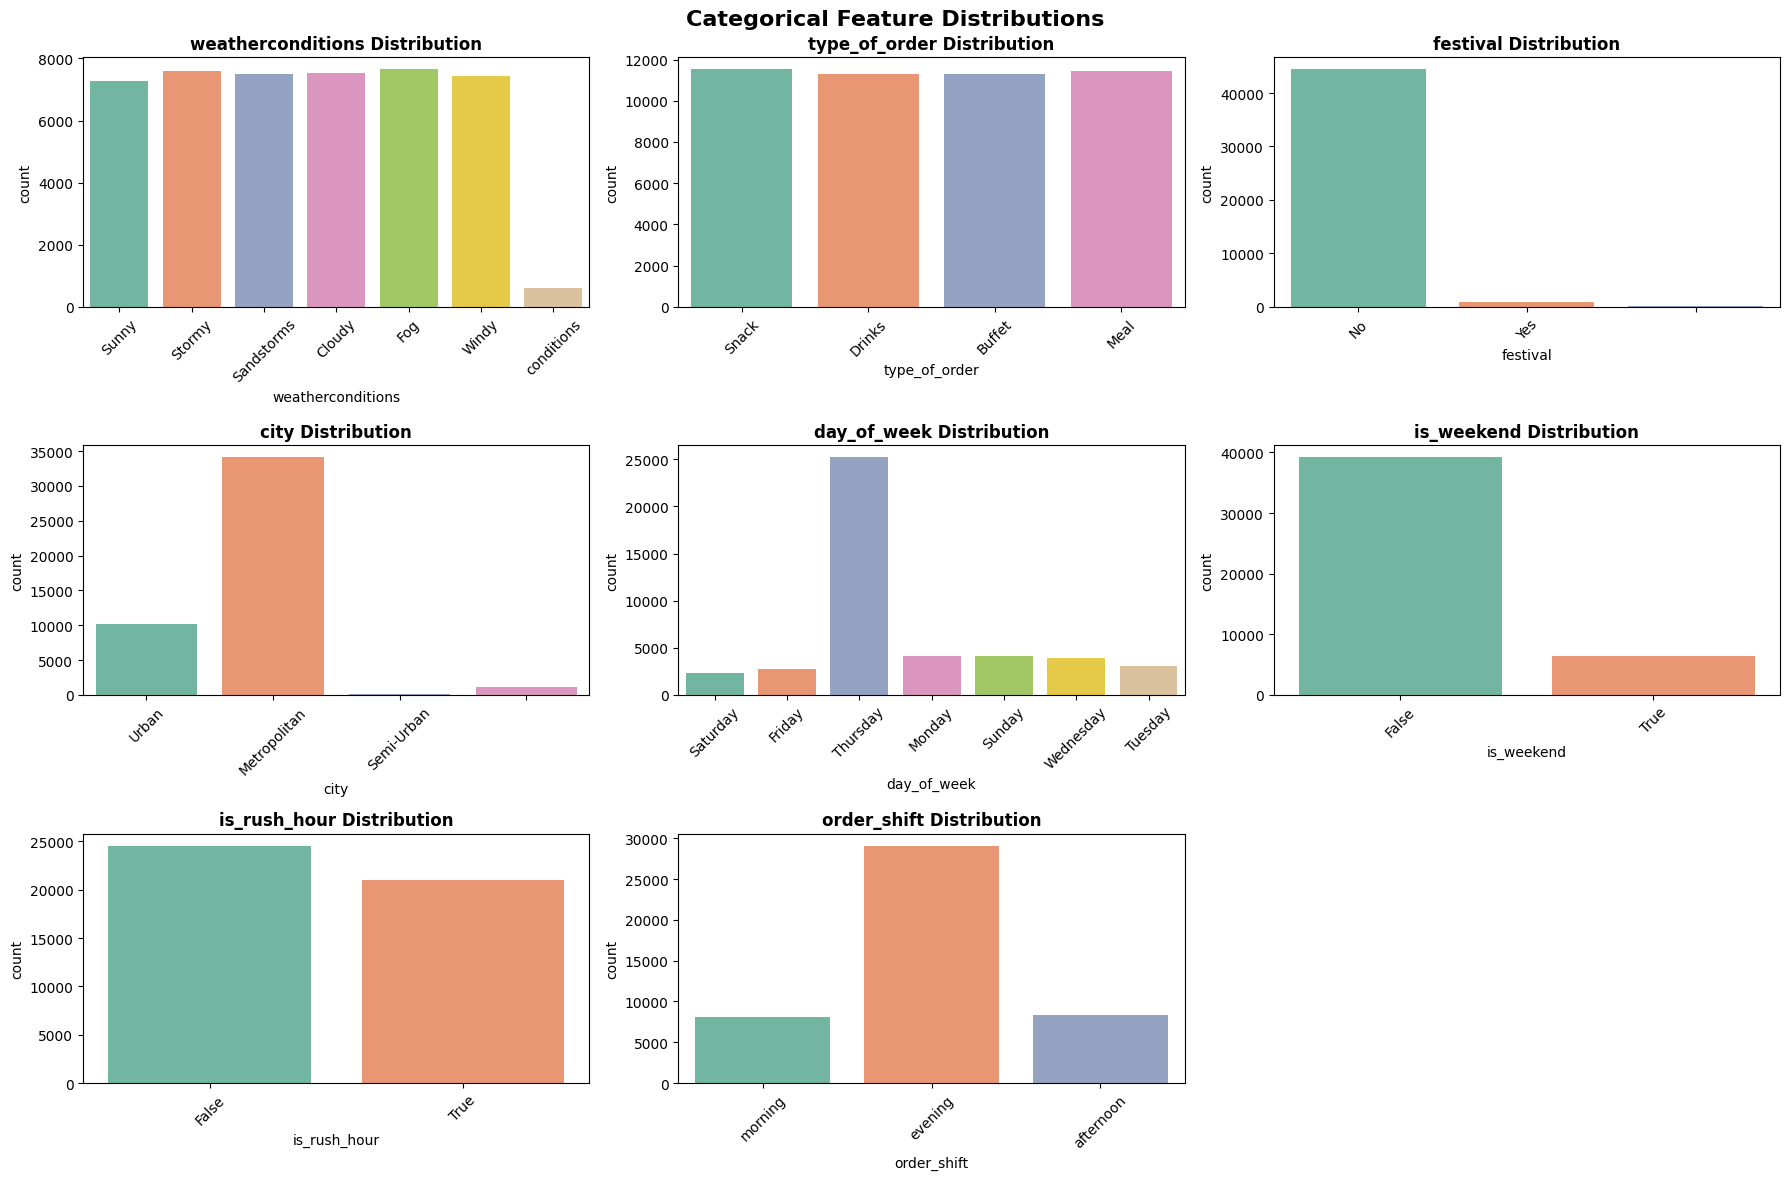

In [266]:
# Number of categorical columns
n_cols = len(categorical_cols)

# Rows and cols for subplots (arrange in grid)
n_rows = math.ceil(n_cols / 3)   # 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Filter out 'type_of_vehicle' from the list of categorical columns
categorical_cols_to_plot = [col for col in categorical_cols if col != 'type_of_vehicle']

# Plot each categorical column
for i, col in enumerate(categorical_cols_to_plot):
    sns.countplot(x=col, data=train_df, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col} Distribution", fontsize=12, fontweight="bold")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots (if any)
# Adjust the range for removing unused subplots based on the filtered list
for j in range(len(categorical_cols_to_plot), len(axes)):
    fig.delaxes(axes[j])


plt.suptitle("Categorical Feature Distributions", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

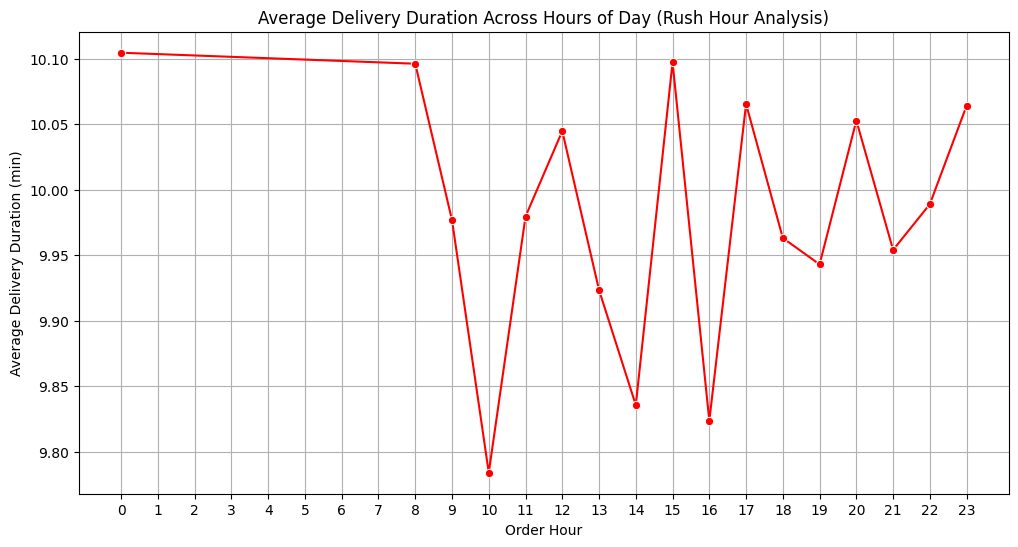

In [267]:
#Rush-hour
rush_df = train_df.groupby('order_hour')['delivery_duration_min'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=rush_df, x='order_hour', y='delivery_duration_min', marker='o', color='red')
plt.title("Average Delivery Duration Across Hours of Day (Rush Hour Analysis)")
plt.xlabel("Order Hour")
plt.ylabel("Average Delivery Duration (min)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

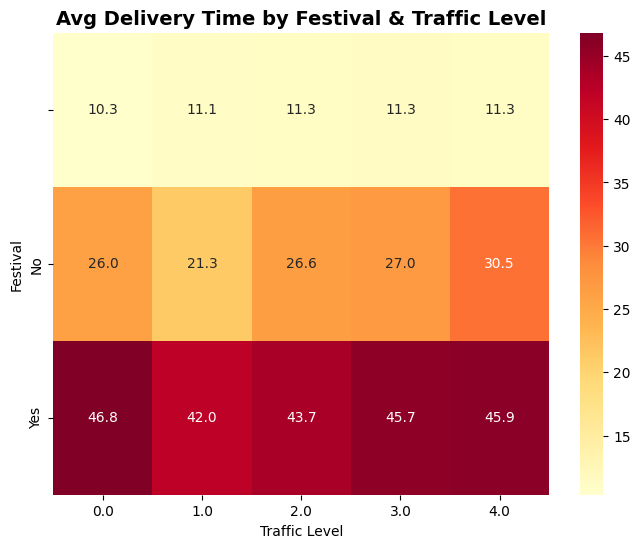

In [272]:
#Avg Delivery Time by Festival & Traffic Level
festival_traffic = train_df.groupby(["festival", "traffic_level"])["time_taken_min"].mean().unstack()
plt.figure(figsize=(8,6))
sns.heatmap(festival_traffic, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Avg Delivery Time by Festival & Traffic Level", fontsize=14, weight="bold")
plt.ylabel("Festival")
plt.xlabel("Traffic Level")
plt.show()

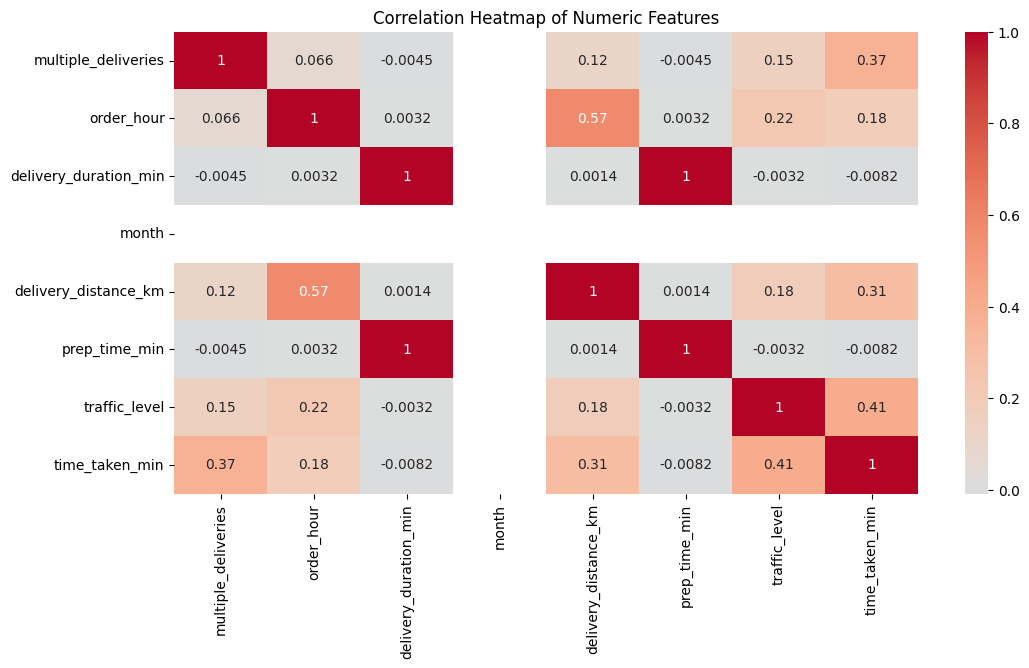

In [273]:
#Correlation Heatmap

plt.figure(figsize=(12,6))
corr = train_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#EDA Insight¶
Before jumping into modeling, I wanted to really understand the data. I looked at missing values, how features could affect the model and Outliers were a major hurdle: some trips finished suspiciously fast while others dragged on, so their influence was evaluated both before and after data cleaning. I also mapped routes with Folium, and when plotting restaurant and drop-off points, a few coordinates popped up in the middle of the ocean, which led to setting rough geographic bounds to filter them out.

In [274]:
train_df.columns

Index(['weatherconditions', 'type_of_order', 'multiple_deliveries', 'festival',
       'city', 'time_taken_min', 'order_hour', 'delivery_duration_min',
       'day_of_week', 'is_weekend', 'month', 'delivery_distance_km',
       'prep_time_min', 'is_rush_hour', 'order_shift', 'traffic_level'],
      dtype='object')

#Preprocessing Pipeline

In [276]:
#Define columns
numeric_features = [ 'delivery_person_ratings',
                    'delivery_distance_km', 'prep_time_min']

categorical_features = ['weatherconditions', 'type_of_order',
                        'type_of_vehicle', 'festival', 'city',
                        'day_of_week', 'is_weekend', 'is_rush_hour',
                        'order_shift', 'traffic_level']

target = "time_taken_min"


#Numeric Transformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # Fill missing with median
    ('scaler', StandardScaler())                     # Scale features
])


# 3. Categorical Transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with mode
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # One-hot encode
])


#Combine with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#Build Preprocessing Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


# Features and target
X = train_df.drop(columns=[target])
y = train_df[target]

# Split into train and validation (e.g., 80% train, 20% val)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (36474, 15) (36474,)
Testing set: (9119, 15) (9119,)
